In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("kc_house_data.csv")
df = pd.DataFrame(data)

In [2]:
print(len(df))
print(df.columns)
print(df.isnull().sum())

21613
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


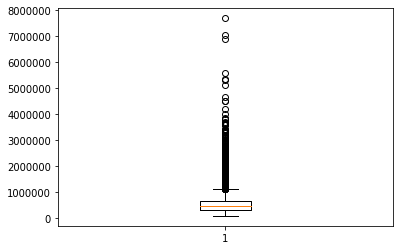

None
The number of outlier is 1146


In [3]:
print(df['price'].describe())
plt.boxplot(df['price'])
print(plt.show())

quartile_1, quartile_3 = np.percentile(df['price'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

outlier_price = 0
for i in range(len(df)):
    if df['price'][i] < lower_bound or df['price'][i] > upper_bound:
        outlier_price+=1
print("The number of outlier is" , outlier_price)


count    2.161300e+04
mean     5.396707e-15
std      1.000023e+00
min     -3.460533e+00
25%     -6.942942e-01
50%     -5.850764e-02
75%      6.250348e-01
max      5.333331e+00
Name: price_log, dtype: float64


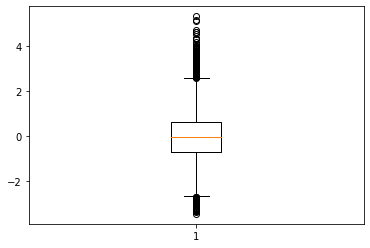

The number of outlier is 333


In [4]:
import math
from sklearn import preprocessing

df['price_log'] = preprocessing.scale(np.log(df['price']+1))
print(df['price_log'].describe())

plt.boxplot(df['price_log'])
plt.show()

quartile_1, quartile_3 = np.percentile(df['price_log'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

outlier_price_log = 0
for i in range(len(df)):
    if df['price_log'][i] < lower_bound or df['price_log'][i] > upper_bound:
        outlier_price_log+=1
print("The number of outlier is" , outlier_price_log)

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


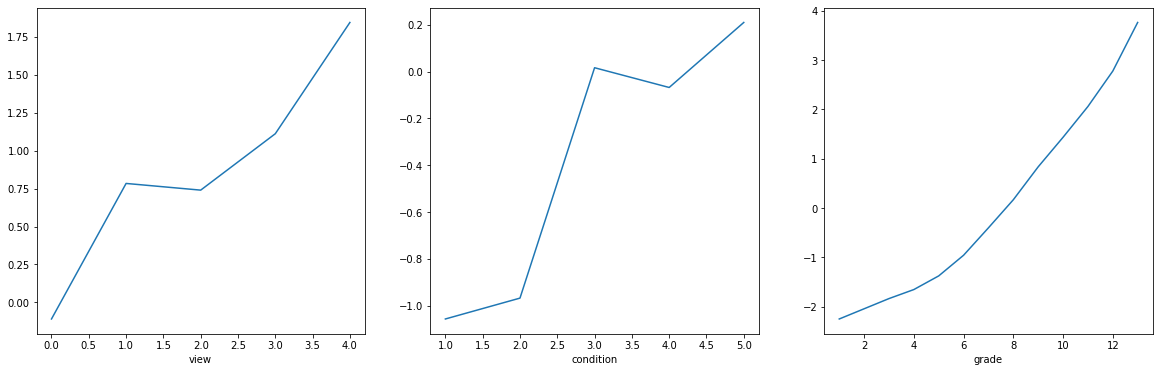

In [5]:
plt.figure(figsize=(20 , 6))

print(df['view'].value_counts())
print('')
plt.subplot(131)
df.groupby('view')['price_log'].mean().plot()

print(df['condition'].value_counts())
print('')
plt.subplot(132)
df.groupby('condition')['price_log'].mean().plot()

print(df['grade'].value_counts())
plt.subplot(133)
df.groupby('grade')['price_log'].mean().plot()

602
47.6872    8
47.6536    7
47.6624    7
47.6857    7
47.6534    6
          ..
47.6805    1
47.6656    1
47.6576    1
47.6677    1
47.6646    1
Name: lat, Length: 294, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


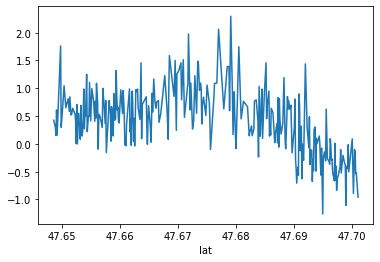

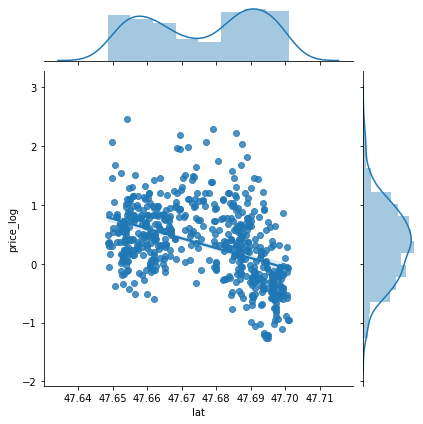

In [10]:
df['zipcode'].value_counts()


df_new = df[df['zipcode'].isin(['98103'])]

df_new['zipcode'].value_counts()
print(len(df_new))
print(df_new['lat'].value_counts())

print(df_new.groupby('lat')['price_log'].mean().plot())
sns.jointplot(x=df_new['lat'],y=df_new['price_log'],kind='reg')

print(df_new.groupby('long')['price_log'].mean().plot())
sns.jointplot(x=df_new['long'],y=df_new['price_log'],kind='reg')

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64
The number of outlier is 0


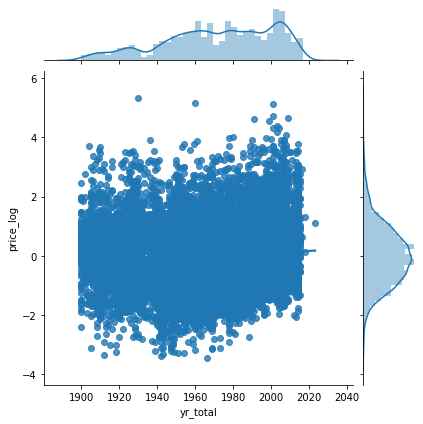

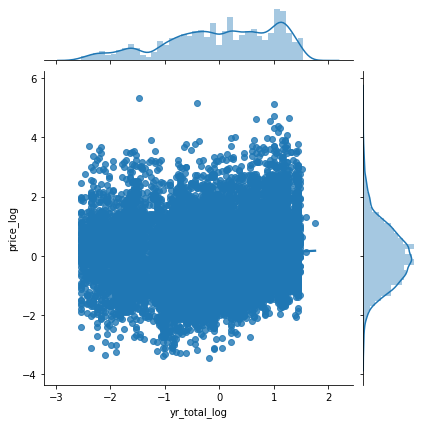

In [5]:
print(df['yr_renovated'].value_counts())
print(df['yr_built'].value_counts())

yr_renovated = df['yr_renovated'].tolist()
yr_built = df['yr_built'].tolist()
yr_total = []

for i in range(len(yr_renovated)):
    if yr_renovated[i] !=0:
        temp = yr_built[i] + yr_renovated[i] * 0.01
    else:
        temp = yr_built[i]

    yr_total.append(temp)
df['yr_total'] = yr_total
df['yr_total_log'] = preprocessing.scale(np.log(df['yr_total']+1))

print(sns.jointplot(x=df['yr_total'],y=df['price_log'],kind='reg'))
print(sns.jointplot(x=df['yr_total_log'],y=df['price_log'],kind='reg'))

quartile_1, quartile_3 = np.percentile(df['yr_total_log'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

outlier_yr_total_log = 0
for i in range(len(df)):
    if df['yr_total_log'][i] < lower_bound or df['yr_total_log'][i] > upper_bound:
        outlier_yr_total_log+=1
print("The number of outlier is" , outlier_yr_total_log)



KeyboardInterrupt: 

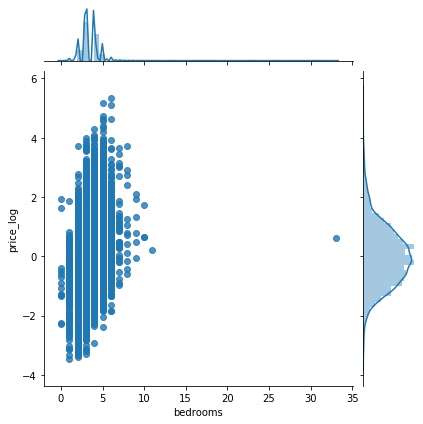

In [6]:
df_final = df[['bedrooms', 'bathrooms', 'sqft_living', 'price_log',
       'sqft_lot', 'floors', 'waterfront', 
       'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15']]

sns.jointplot(x=df_final['bedrooms'],y=df_final['price_log'],kind='reg')

sns.jointplot(x=df_final['sqft_living'],y=df_final['price_log'],kind='reg')

sns.jointplot(x=df_final['bathrooms'],y=df_final['price_log'],kind='reg')



sns.jointplot(x=df_final['floors'],y=df_final['price_log'],kind='reg')

#sns.jointplot(x=df_final['waterfront'],y=df_final['price_log'],kind='reg')

sns.jointplot(x=df_final['sqft_above'],y=df_final['price_log'],kind='reg')

sns.jointplot(x=df_final['sqft_basement'],y=df_final['price_log'],kind='reg')

sns.jointplot(x=df_final['sqft_living15'],y=df_final['price_log'],kind='reg')

sns.jointplot(x=df_final['sqft_lot'],y=df_final['price_log'],kind='reg')

sns.jointplot(x=df_final['sqft_lot15'],y=df_final['price_log'],kind='reg')


C:\Users\sean\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


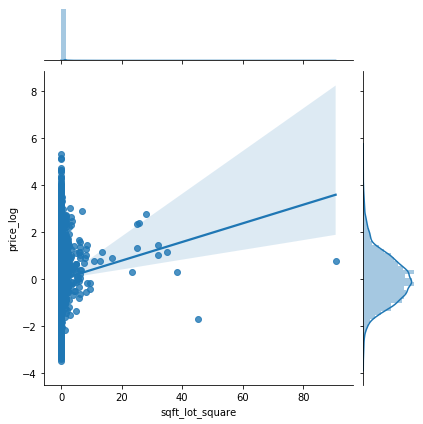

In [9]:
df_test = df

df_test['sqft_lot_square'] = preprocessing.scale(np.square(df['sqft_lot']+1))

sns.jointplot(x=df_test['sqft_lot_square'],y=df_test['price_log'],kind='reg')   

C:\Users\sean\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


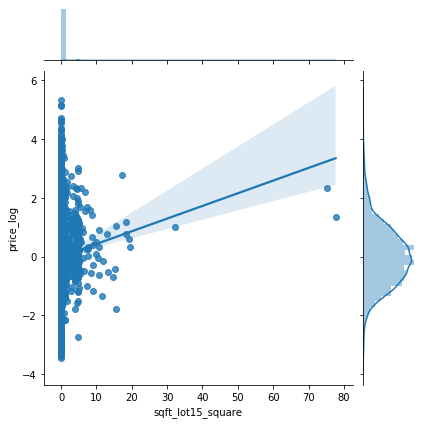

In [10]:
df_test['sqft_lot15_square'] = preprocessing.scale(np.square(df['sqft_lot15']+1))

sns.jointplot(x=df_test['sqft_lot15_square'],y=df_test['price_log'],kind='reg')


In [7]:
from sklearn import model_selection
from sklearn import metrics
import statsmodels.api as sm

x_data = df[['bedrooms', 'bathrooms', 'sqft_living', 'yr_total_log' ,
       'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_basement', 'sqft_living15']]
y_data = df['price_log']
x_data['intercept'] = 1

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)


lm = sm.OLS(y_data, x_data)
results = lm.fit()
results.summary()

C:\Users\sean\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3675.
Date:                Sat, 26 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:52:46   Log-Likelihood:                -19268.
No. Observations:               21613   AIC:                         3.856e+04
Df Residuals:                   21601   BIC:                         3.866e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0425      0.006     -7.706      0.000      -0.053      -0.032
bathrooms         0.1575      0.010     16.572      0.000       0.139       0.176
sqft_living       0.0002   1.05e-05     17.650      0.000       0.000       0.000
yr_total_log     -0.3085      0.005    -56.216      0.000      -0.319      -0.298
floors            0.2330      0.010     22.704      0.000       0.213       0.253
waterfront        0.7015      0.051     13.804      0.000       0.602       0.801
view              0.0762      0.006     12.301      0.000       0.064       0.088
condition         0.0705      0.007     10.412      0.000       0.057       0.084
grade             0.3957      0.006     64.530      0.000       0.384       0.408
sqft_basement     0.0002   1.23e-05     14.217      0.000       0.000       0.000
sqft_living15     0.0002    9.8e-06     20.881      0.000       0.000       0.000
intercept        -4.6731      0.045   -103.855      0.000      -4.761      -4.585
==============================================================================
Omnibus:                       84.922   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.465
Skew:                          -0.098   Prob(JB):                     4.15e-22
Kurtosis:                       3.266   Cond. No.                     3.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,1.630249,bedrooms
1,3.324926,bathrooms
2,5.737185,sqft_living
3,1.868587,yr_total_log
4,1.904802,floors
5,1.198941,waterfront
6,1.397925,view
7,1.204033,condition
8,3.221975,grade
9,1.845738,sqft_basement


(-1, 9.4)

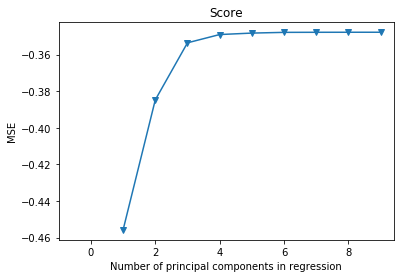

In [8]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

x_data = df[['bedrooms', 'bathrooms', 'sqft_living', 'yr_total_log',
       'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_basement', 'sqft_living15']]
y_data = df['price_log']


x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(x_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

# Plot results
plt.plot(np.arange(1, 10), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

pls = PLSRegression(n_components=3)
pls.fit(scale(x_train), y_train)

y_cv = cross_val_predict(pls, x_data, y_data, cv=10)
print(len(y_data))
print(len(y_cv))
print(y_data)
print(y_cv)
print(r2_score(y_data, y_cv))
print(mean_squared_error(y_data, y_cv))

21613
21613
0       -1.400936
1        0.280624
2       -1.798279
3        0.500335
4        0.179141
           ...   
21608   -0.482193
21609   -0.282144
21610   -0.272197
21611   -0.282144
21612   -0.676391
Name: price_log, Length: 21613, dtype: float64
[[-0.80315599]
 [-0.07403139]
 [-0.55372785]
 ...
 [-1.23354238]
 [-0.46378989]
 [-1.22344402]]
0.6425636493074995
0.35743635069250035
